## 問題設定
日本人女性は、世界で一番睡眠時間が短いと言われている。  
そんな国において男性の睡眠時間はどうなっているのだろうか。  
そこで、男性の睡眠時間と女性の睡眠時間の関係を検証したい。  
つまり、男性の睡眠時間を女性の睡眠時間によって説明したい。

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

In [176]:
df = pd.read_csv('sleeptime.csv')

In [177]:
df.head()

,都道府県,男,女
0,北海道,475,467
1,青森県,488,472
2,岩手県,478,471
3,宮城県,470,463
4,秋田県,488,477


In [178]:
df[['男','女']].describe()

,男,女
count,47.000000,47.000000
mean,470.127660,457.340426
std,7.634638,7.047283
min,454.000000,448.000000
25%,466.500000,452.000000
50%,470.000000,455.000000
75%,475.000000,460.500000
max,488.000000,477.000000


In [179]:
y = df['男']
x = df['女']

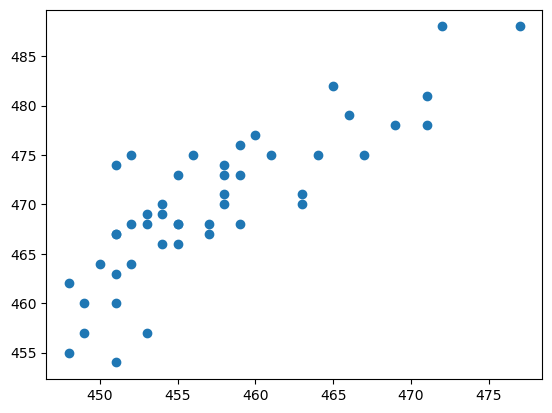

In [180]:
plt.scatter(x, y)

一見して、極端な外れ値や１つの説明変数で目的変数の取りうる値が複数ないので、  
このデータは回帰分析可能であると思われる。

In [181]:
p_s = 0.05

In [182]:
r, p = pearsonr(x,y)

In [183]:
p

3.564184721648239e-13

In [184]:
if p < p_s:
    print(f'x と y には相関があり、相関係数は{r:.4f}であった。')
else:
    print(f'x と y には相関がない可能性を排除できなかった')

x と y には相関があり、相関係数は0.8335であった。


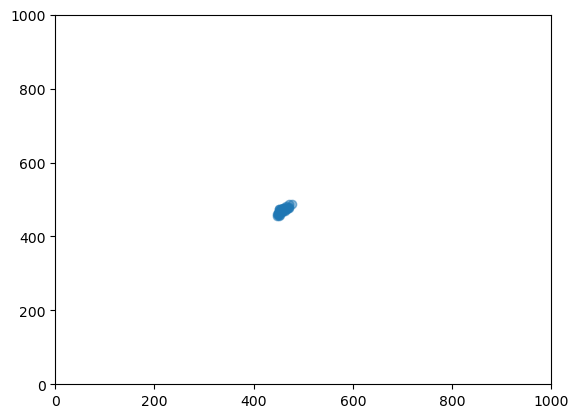

In [185]:
plt.scatter(x,y,alpha=0.5)
plt.xlim(xmin=0,xmax=1000)
plt.ylim(ymin=0,ymax=1000)
plt.show()

In [208]:
beta_0 =12.8
beta_1 = 1

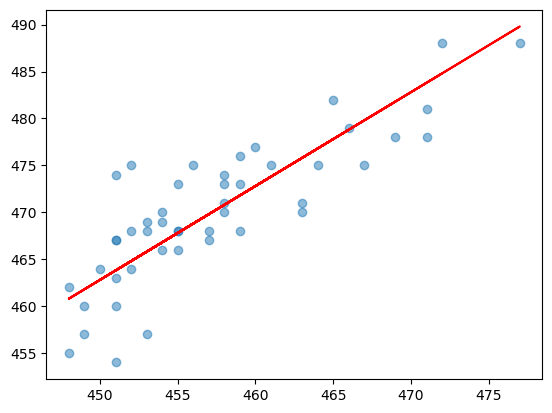

In [209]:
y_est = beta_0 + beta_1 * x
plt.scatter(x,y,alpha=0.5)
plt.plot(x,y_est,c='r')
plt.show()

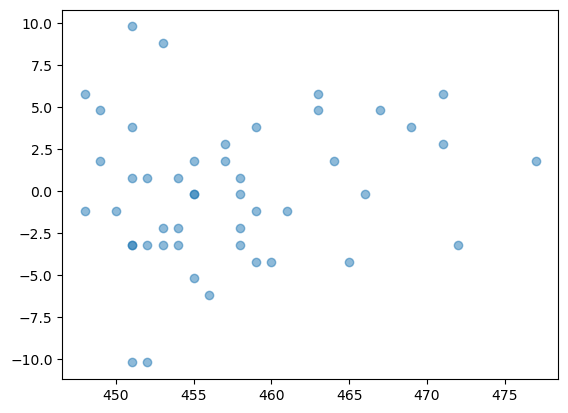

In [210]:
resid = y_est - y
plt.scatter(x,resid,alpha=0.5)
plt.show()

In [211]:
np.sum(resid**2)

839.8799999999997

In [190]:
log = {
    "切片":[100,50,20,19,21,21,19,15,10,12,13,14,12.5,12.75,12.8],
    "傾き":[0.3,0.5,1,0.9,0.9,1,1,1,1,1,1,1,1,1,1],
    "誤差２乗和":[2551601,1724019,3285,84229,66987,4010,2654,1070,1205,869,842,909,843.75,839.9375,839.879]
    }

In [191]:
log_df = pd.DataFrame(log)
log_df

,切片,傾き,誤差２乗和
0,100.00,0.3,2.551601e+06
1,50.00,0.5,1.724019e+06
2,20.00,1.0,3.285000e+03
3,19.00,0.9,8.422900e+04
4,21.00,0.9,6.698700e+04
5,21.00,1.0,4.010000e+03
6,19.00,1.0,2.654000e+03
7,15.00,1.0,1.070000e+03
8,10.00,1.0,1.205000e+03
9,12.00,1.0,8.690000e+02


In [194]:
X = sm.add_constant(x)
model = sm.OLS(y,X)
res = model.fit()

In [212]:
beta0_est, beta1_est = res.params

In [213]:
print(beta0_est)
print(beta1_est)

57.14807122767161
0.9030025890811575


In [214]:
y_est = beta0_est + beta1_est*x


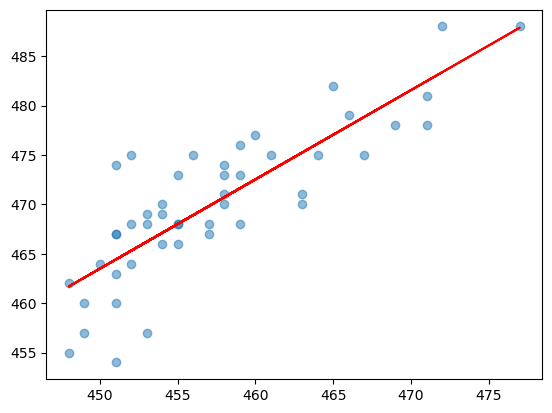

In [220]:
plt.scatter(x,y,alpha=0.5)
plt.plot(x,y_est,c='r')
plt.show()

In [216]:
resid = y_est - y

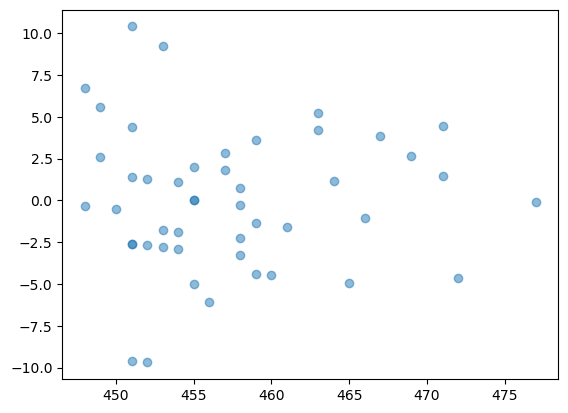

In [217]:
plt.scatter(x,resid,alpha=0.5)
plt.show()

In [218]:
np.sum(resid**2)

818.3781269208561